### alexnet

- 5개의 합성곱(conv) 계층과, 3개의 완전 연결 계층(fc)

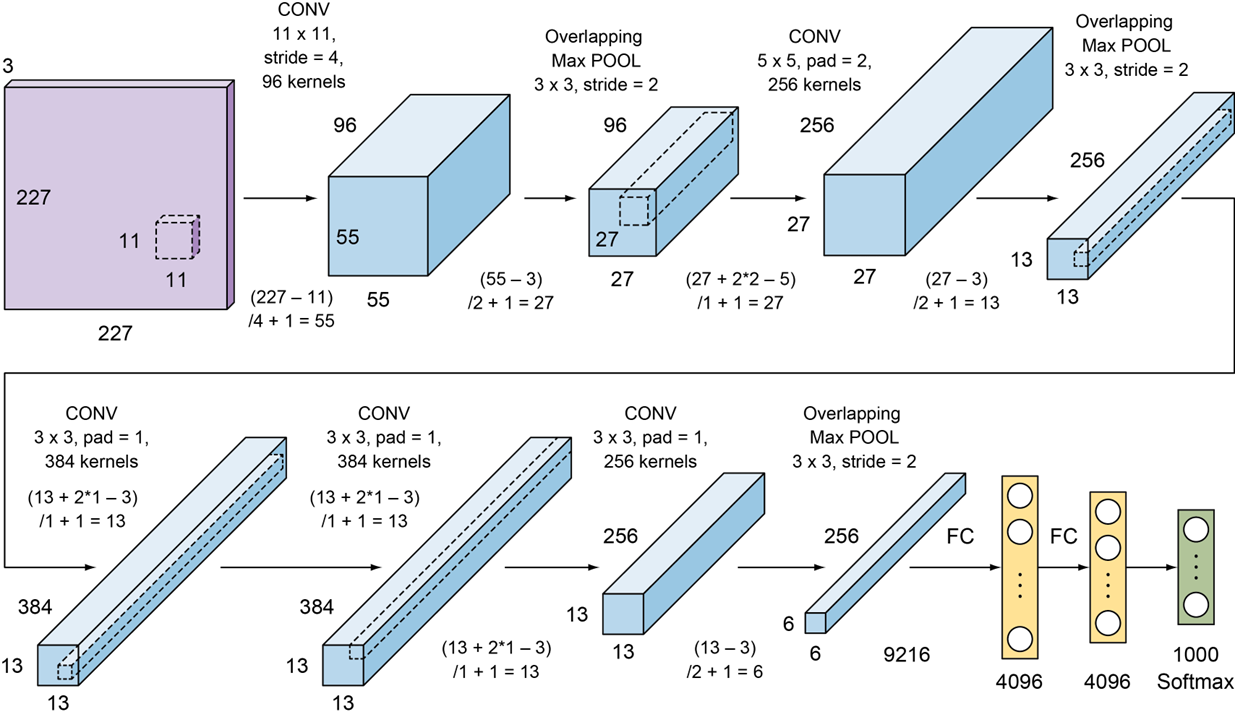

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

2024-10-30 18:15:30.412818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-30 18:15:30.437430: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-30 18:15:30.444195: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-30 18:15:30.457163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-30 18:15:31.223933: W tensorflow/compiler/tf2

In [2]:
IMG_ROWS, IMG_COLS = 227, 227 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3)
CLASSES = 1000  # number of outputs = number of digits

In [6]:
def Alex_custum(input_shape, classes):
    model = models.Sequential()
    # 시작 층
    model.add(layers.Conv2D(filters = 96, kernel_size = 11, activation='relu',
                                   strides=(4,4), input_shape=input_shape))
    model.add(layers.MaxPool2D((3,3), strides = 2))
    # 두번 째 필터층
    model.add(layers.Convolution2D(filters = 256, kernel_size = 5, activation='relu',
                                   padding='same'))
    model.add(layers.MaxPool2D((3,3), strides = 2))
    # 이후 필터층
    model.add(layers.Convolution2D(filters = 384, kernel_size = 3, activation='relu',padding='same'))
    model.add(layers.Convolution2D(filters = 384, kernel_size = 3, activation='relu',padding='same'))
    model.add(layers.Convolution2D(filters = 256, kernel_size = 3, activation='relu',padding='same'))

    model.add(layers.MaxPool2D((3,3), strides = 2))

    # Flatten
    model.add(layers.Flatten())

    # 완전 연결 층 (실제로 각 층 사이에 드랍아웃이 있다.)
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))

    return model

In [7]:
model = Alex_custum(INPUT_SHAPE, CLASSES)
model.summary()

I0000 00:00:1730279797.848136   46324 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730279797.906088   46324 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730279797.908438   46324 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730279797.911887   46324 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,378,344 (237.95 MB)

 Trainable params: 62,378,344 (237.95 MB)

 Non-trainable params: 0 (0.00 B)